In [2]:
import json
from pathlib import Path

folds_path = Path("data/processed_folds/final/arima/arima_tuning_folds.json")
with folds_path.open("r") as f:
    reps_ids = json.load(f)

if isinstance(reps_ids, dict) and "arima" in reps_ids:
    summary_list = reps_ids["arima"]
elif isinstance(reps_ids, list):
    summary_list = reps_ids
else:
    raise ValueError(f"Unexpected format in {folds_path}")

In [3]:
base_dir = folds_path.parents[2]

In [4]:
import pandas as pd

for fold_info in summary_list:
    fid = fold_info["global_fold_id"]
    train_rel_path = fold_info.get("final_train_path") or fold_info.get("train_path_arima")
    val_rel_path = fold_info.get("final_val_path") or fold_info.get("val_path_arima")

    if not train_rel_path or not val_rel_path:
        print(f"Skipping fold {fid}: Missing train/val paths.")
        continue
    train_csv_path = base_dir / train_rel_path
    val_csv_path = base_dir / val_rel_path

    if not train_csv_path.exists() or not val_csv_path.exists():
        print(f"Skipping fold {fid}: File not found at {train_csv_path} or {val_csv_path}")
        continue
    try:
        train_df = pd.read_csv(train_csv_path)
        val_df = pd.read_csv(val_csv_path)
        print(f"\nSuccessfully loaded data for fold {fid}:")
        print("Train data shape:", train_df.shape)
        print("Validation data shape:", val_df.shape)
        
        if "Log_Returns" in train_df.columns:
            print("Log_Returns column exists in train data.")

    except Exception as e:
        print(f"An error occurred while reading fold {fid}: {e}")


Successfully loaded data for fold 3:
Train data shape: (252, 4)
Validation data shape: (42, 4)
Log_Returns column exists in train data.

Successfully loaded data for fold 133:
Train data shape: (252, 4)
Validation data shape: (42, 4)
Log_Returns column exists in train data.

Successfully loaded data for fold 324:
Train data shape: (252, 4)
Validation data shape: (42, 4)
Log_Returns column exists in train data.

Successfully loaded data for fold 258:
Train data shape: (252, 4)
Validation data shape: (42, 4)
Log_Returns column exists in train data.

Successfully loaded data for fold 585:
Train data shape: (252, 4)
Validation data shape: (42, 4)
Log_Returns column exists in train data.

Successfully loaded data for fold 451:
Train data shape: (252, 4)
Validation data shape: (42, 4)
Log_Returns column exists in train data.

Successfully loaded data for fold 663:
Train data shape: (252, 4)
Validation data shape: (42, 4)
Log_Returns column exists in train data.

Successfully loaded data for

In [5]:
train_df = pd.read_csv(train_csv_path)
val_df = pd.read_csv(val_csv_path)
        
print(f"\nSuccessfully loaded data for fold {fid}:")
print("Train data shape:", train_df.shape)
print("Validation data shape:", val_df.shape)
        
train_missing = train_df.isnull().sum()
val_missing = val_df.isnull().sum()
        
print("\nMissing values in Train data:")
print(train_missing[train_missing > 0])
print("\nMissing values in Validation data:")
print(val_missing[val_missing > 0])
        

if "Log_Returns" in train_df.columns:
    print(f"\nLog_Returns data type (Train): {train_df['Log_Returns'].dtype}")



Successfully loaded data for fold 81:
Train data shape: (252, 4)
Validation data shape: (42, 4)

Missing values in Train data:
Series([], dtype: int64)

Missing values in Validation data:
Series([], dtype: int64)

Log_Returns data type (Train): float64


In [6]:
print("\nDescriptive Statistics for Train data:")
print(train_df.describe())
print("\nDescriptive Statistics for Validation data:")
print(val_df.describe())


Descriptive Statistics for Train data:
        Close_raw  Log_Returns      Volume
count  252.000000   252.000000  252.000000
mean    34.962212     0.001605   -0.232844
std      4.189458     0.011165    0.195693
min     26.020000    -0.055803   -0.505778
25%     32.016251    -0.002530   -0.350775
50%     35.834999     0.002005   -0.272502
75%     38.370001     0.007032   -0.168380
max     41.735001     0.051621    1.177372

Descriptive Statistics for Validation data:
       Close_raw  Log_Returns     Volume
count  42.000000    42.000000  42.000000
mean   42.758274     0.000896  -0.238119
std     0.609775     0.011466   0.146980
min    41.320000    -0.028010  -0.463061
25%    42.307500    -0.004963  -0.325127
50%    42.787498     0.000296  -0.269714
75%    43.305625     0.007048  -0.203790
max    43.715000     0.034724   0.296747


Insight: The average price in the Validation set is significantly higher than in the Train set, indicating a strong upward price trend. The lower standard deviation in the Validation set may suggest that this period is less volatile or that the data has been processed (e.g., normalized).

Standard deviation (std): The standard deviation of Log_Returns is an important measure of volatility. Both sets have quite similar std values (0.011165 vs 0.011466), indicating that the level of daily return volatility is fairly consistent between the two periods

The minimum and maximum values of Log_Returns fall within a narrow and relatively symmetrical range (e.g., in the Train set from -0.055 to 0.051).
This symmetry suggests that the distribution of Log_Returns may approximate a normal distribution. This is an important assumption for many financial models and ARIMA models.

Insight: The mean and standard deviation of Volume in both sets are quite similar, indicating that the trading volume has been processed consistently across the two periods. This is beneficial as it ensures the uniformity of input data for the model.

In [13]:
train_df.tail(20)

,Date,Close_raw,Log_Returns,Volume
232,2017-10-05,38.512501,0.010375,-0.341532
233,2017-10-06,38.639999,0.003305,-0.406444
234,2017-10-09,38.872501,0.005999,-0.425613
235,2017-10-10,38.775002,-0.002511,-0.436430
236,2017-10-11,38.937500,0.004182,-0.414851
237,2017-10-12,38.932499,-0.000128,-0.427921
238,2017-10-13,39.102501,0.004357,-0.423415
239,2017-10-16,39.412498,0.007897,-0.294011
240,2017-10-17,39.807499,0.009972,-0.379822
241,2017-10-18,39.900002,0.002321,-0.423750


In [9]:
df_raw = pd.read_csv('data/cleaned/train_val_for_wf_with_features.csv')
df_raw.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Log_Returns,Transformed_Open,...,OBV_lag_3,Log_Returns_lag_3,Close_lag_5,RSI_7_lag_5,RSI_14_lag_5,OBV_lag_5,Log_Returns_lag_5,target_log_returns,target,Close_raw
0,AAPL,2010-02-02,5.886413,6.995000,7.011429,6.906429,6.996786,698342400,0.010814,2.205886,...,-2.516458e+09,-0.004168,7.235000,37.794671,26.940207,3.796128e+08,0.011868,0.005364,0,6.906429
1,AAPL,2010-02-03,5.987696,7.115357,7.150000,6.943571,6.970357,615328000,0.005364,2.231967,...,-3.762410e+09,-0.043457,7.126071,32.639603,24.893515,-1.342956e+09,-0.015170,-0.014767,0,6.943571
2,AAPL,2010-02-04,5.771907,6.858929,7.084643,6.841786,7.026071,757652000,-0.014767,2.175985,...,-3.012534e+09,0.005504,7.096429,31.284881,24.351359,-2.516458e+09,-0.004168,-0.003766,0,6.841786
3,AAPL,2010-02-05,5.874393,6.980714,7.000000,6.816071,6.879643,850306800,-0.003766,2.202768,...,-2.314192e+09,0.010814,6.794643,20.954454,19.657404,-3.762410e+09,-0.043457,0.016370,1,6.816071
4,AAPL,2010-02-08,5.834117,6.932857,7.067143,6.928571,6.988929,478270800,0.016370,2.192285,...,-1.698864e+09,0.005364,6.832143,24.565490,21.677709,-3.012534e+09,0.005504,0.003859,0,6.928571


In [14]:
volume_raw = df_raw['Volume'][:10]

volume_mean = volume_raw.mean()
volume_std = volume_raw.std()

print(f"Giá trị trung bình của Volume gốc: {volume_mean}")
print(f"Độ lệch chuẩn của Volume gốc: {volume_std}")

for value in volume_raw:
    scaled_value = (value - volume_mean) / volume_std
    print(f"Giá trị {value} được scale thành: {scaled_value:.6f}")

Giá trị trung bình của Volume gốc: 615270040.0
Độ lệch chuẩn của Volume gốc: 138412917.10915166
Giá trị 698342400 được scale thành: 0.600178
Giá trị 615328000 được scale thành: 0.000419
Giá trị 757652000 được scale thành: 1.028675
Giá trị 850306800 được scale thành: 1.698084
Giá trị 478270800 được scale thành: -0.989787
Giá trị 632886800 được scale thành: 0.127277
Giá trị 370361600 được scale thành: -1.769405
Giá trị 550345600 được scale thành: -0.469063
Giá trị 655468800 được scale thành: 0.290426
Giá trị 543737600 được scale thành: -0.516805


In [10]:
df_scaled = pd.read_csv('data/scaled/global/train_val_scaled.csv')
df_scaled.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Log_Returns,Transformed_Open,...,OBV_lag_3,Log_Returns_lag_3,Close_lag_5,RSI_7_lag_5,RSI_14_lag_5,OBV_lag_5,Log_Returns_lag_5,target_log_returns,target,Close_raw
0,AAPL,2010-02-02,-0.730553,-0.728545,-0.730264,-0.728572,-0.728556,2.225697,0.010814,0.285541,...,-0.592852,-0.262433,-0.719249,-0.827329,-1.665769,-0.471449,0.563575,0.005364,0,6.906429
1,AAPL,2010-02-03,-0.728025,-0.725579,-0.726879,-0.727648,-0.729208,1.878152,0.005364,0.287681,...,-0.644807,-2.286326,-0.721971,-1.068567,-1.787456,-0.543351,-0.829482,-0.014767,0,6.943571
2,AAPL,2010-02-04,-0.733411,-0.731899,-0.728476,-0.730182,-0.727834,2.474000,-0.014767,0.283089,...,-0.613538,0.235813,-0.722712,-1.131962,-1.819691,-0.592334,-0.262641,-0.003766,0,6.841786
3,AAPL,2010-02-05,-0.730853,-0.728898,-0.730543,-0.730822,-0.731444,2.861905,-0.003766,0.285286,...,-0.584418,0.509372,-0.730253,-1.615388,-2.098773,-0.644341,-2.286865,0.016370,1,6.816071
4,AAPL,2010-02-08,-0.731858,-0.730077,-0.728903,-0.728021,-0.728750,1.304354,0.016370,0.284426,...,-0.558760,0.228583,-0.729316,-1.446405,-1.978654,-0.613041,0.235687,0.003859,0,6.928571


In [15]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, name):
    print(f"--- Kiểm tra tính dừng cho {name} ---")
    result = adfuller(series.dropna())
    p_value = result[1]
    print(f"Giá trị p-value: {p_value:.6f}")
    if p_value < 0.05:
        print(f"Kết quả: Dữ liệu CÓ tính dừng. (p-value < 0.05)")
    else:
        print(f"Kết quả: Dữ liệu KHÔNG có tính dừng. (p-value >= 0.05)")

check_stationarity(train_df['Log_Returns'], 'Train Log_Returns')
check_stationarity(val_df['Log_Returns'], 'Validation Log_Returns')

--- Kiểm tra tính dừng cho Train Log_Returns ---
Giá trị p-value: 0.000000
Kết quả: Dữ liệu CÓ tính dừng. (p-value < 0.05)
--- Kiểm tra tính dừng cho Validation Log_Returns ---
Giá trị p-value: 0.000000
Kết quả: Dữ liệu CÓ tính dừng. (p-value < 0.05)


--- Kiểm tra ngoại lai cho Train Log_Returns (sử dụng 3 std) ---
Tìm thấy 5 giá trị ngoại lai.
Ví dụ về các giá trị ngoại lai:
61     0.051621
134   -0.032917
150   -0.055803
183   -0.038359
187    0.050902
Name: Log_Returns, dtype: float64


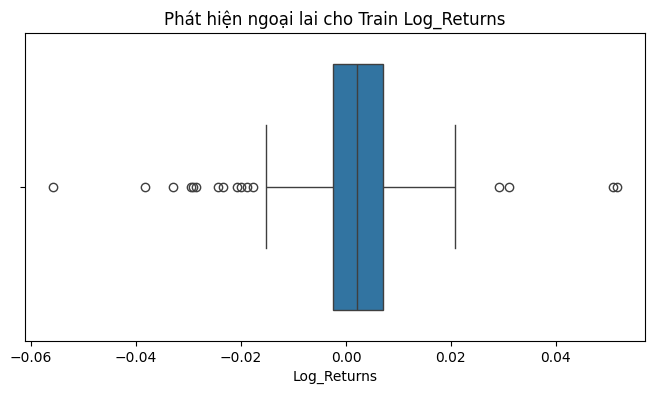

--- Kiểm tra ngoại lai cho Validation Log_Returns (sử dụng 3 std) ---
Tìm thấy 0 giá trị ngoại lai.


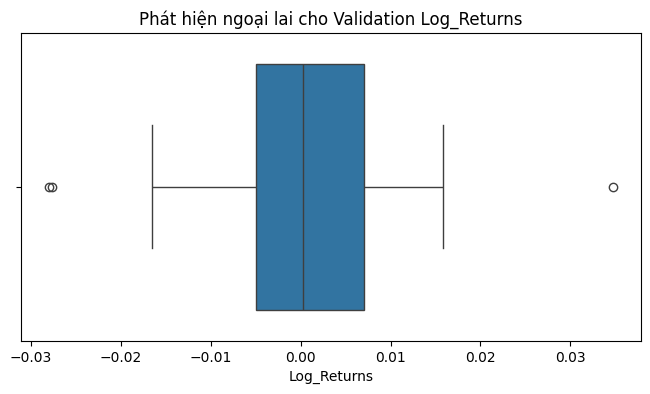

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def find_outliers(series, name, num_stds=3):
    series = series.dropna()
    mean = series.mean()
    std = series.std()
    lower_bound = mean - num_stds * std
    upper_bound = mean + num_stds * std
    
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    print(f"--- Kiểm tra ngoại lai cho {name} (sử dụng {num_stds} std) ---")
    print(f"Tìm thấy {len(outliers)} giá trị ngoại lai.")
    if not outliers.empty:
        print("Ví dụ về các giá trị ngoại lai:")
        print(outliers)

    # Vẽ biểu đồ hộp
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=series)
    plt.title(f'Phát hiện ngoại lai cho {name}')
    plt.show()

# Thực hiện kiểm tra
find_outliers(train_df['Log_Returns'], 'Train Log_Returns')
find_outliers(val_df['Log_Returns'], 'Validation Log_Returns')

--- Biểu đồ tự tương quan cho Train Log_Returns ---


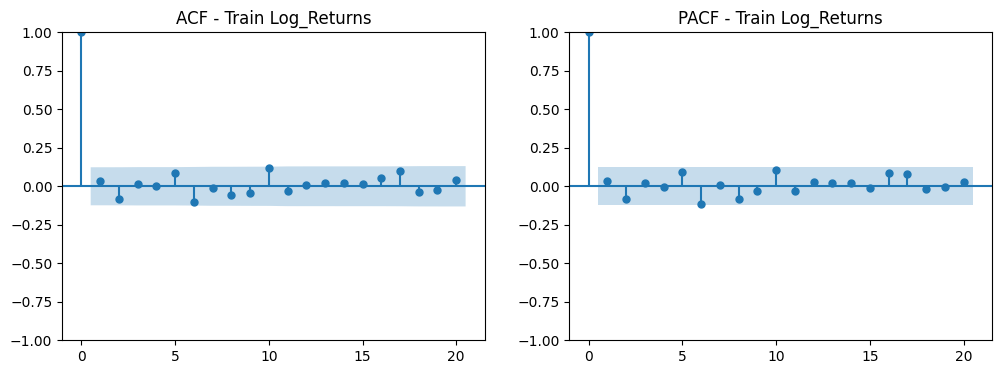

--- Biểu đồ tự tương quan cho Validation Log_Returns ---


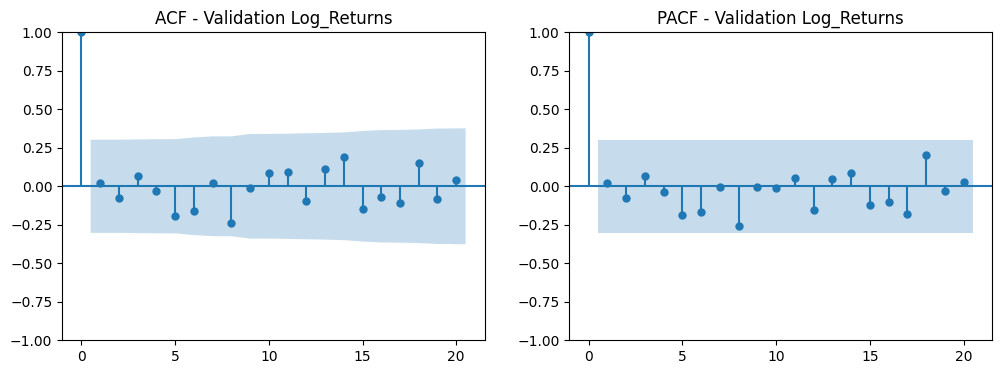

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_autocorrelation(series, name):
    print(f"--- Biểu đồ tự tương quan cho {name} ---")
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(series.dropna(), ax=axes[0], lags=20)
    plot_pacf(series.dropna(), ax=axes[1], lags=20)
    axes[0].set_title(f'ACF - {name}')
    axes[1].set_title(f'PACF - {name}')
    plt.show()

# Thực hiện kiểm tra
plot_autocorrelation(train_df['Log_Returns'], 'Train Log_Returns')
plot_autocorrelation(val_df['Log_Returns'], 'Validation Log_Returns')

--- So sánh thống kê giữa Train và Validation ---

Thống kê mô tả cho Log_Returns:
            Train  Validation
count  252.000000   42.000000
mean     0.001605    0.000896
std      0.011165    0.011466
min     -0.055803   -0.028010
25%     -0.002530   -0.004963
50%      0.002005    0.000296
75%      0.007032    0.007048
max      0.051621    0.034724


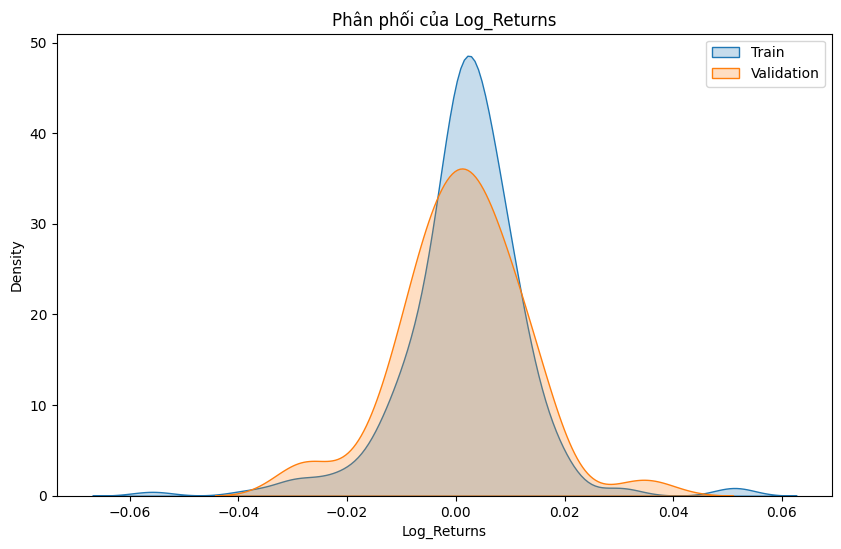

In [18]:
print("--- So sánh thống kê giữa Train và Validation ---")
print("\nThống kê mô tả cho Log_Returns:")
print(pd.DataFrame({
    'Train': train_df['Log_Returns'].describe(),
    'Validation': val_df['Log_Returns'].describe()
}))

# Trực quan hóa so sánh
plt.figure(figsize=(10, 6))
sns.kdeplot(train_df['Log_Returns'].dropna(), label='Train', fill=True)
sns.kdeplot(val_df['Log_Returns'].dropna(), label='Validation', fill=True)
plt.title('Phân phối của Log_Returns')
plt.legend()
plt.show()